# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

## Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load dataframes which have already been cleaned and saved to csv.

In [183]:
X = pd.read_csv('X_full.csv')
y= pd.read_csv('target.csv')

In [184]:
X.head()

,Unnamed: 0,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,day_week,month,number_of_open_complaints,number_of_policies,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,56274.0000,69,384.81,32,5,3,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,59108.7738,94,1131.46,13,42,0,1,0,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,48767.0000,108,566.47,18,38,5,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,39069.2262,106,529.88,18,65,3,1,0,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,43836.0000,73,138.13,12,44,3,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
y.head()

,Unnamed: 0,customer_lifetime_value
0,0,2763.52
1,1,6979.54
2,2,12887.43
3,3,7645.86
4,4,2813.69


In [186]:
X.drop('Unnamed: 0', axis=1, inplace=True)
y.drop('Unnamed: 0', axis=1, inplace=True)

In [187]:
df = X.join(y)
df.head()

,income,monthly_premium_auto,total_claim_amount,months_since_last_claim,months_since_policy_inception,day_week,month,number_of_open_complaints,number_of_policies,coverage,...,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,customer_lifetime_value
0,56274.0000,69,384.81,32,5,3,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2763.52
1,59108.7738,94,1131.46,13,42,0,1,0,8,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6979.54
2,48767.0000,108,566.47,18,38,5,2,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12887.43
3,39069.2262,106,529.88,18,65,3,1,0,7,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,7645.86
4,43836.0000,73,138.13,12,44,3,2,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2813.69


In [188]:
continuous = X.iloc[:,0:3].join(y) # take continuous numerical variables from the dataset

In [189]:
continuous.head()

,income,monthly_premium_auto,total_claim_amount,customer_lifetime_value
0,56274.0000,69,384.81,2763.52
1,59108.7738,94,1131.46,6979.54
2,48767.0000,108,566.47,12887.43
3,39069.2262,106,529.88,7645.86
4,43836.0000,73,138.13,2813.69


/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

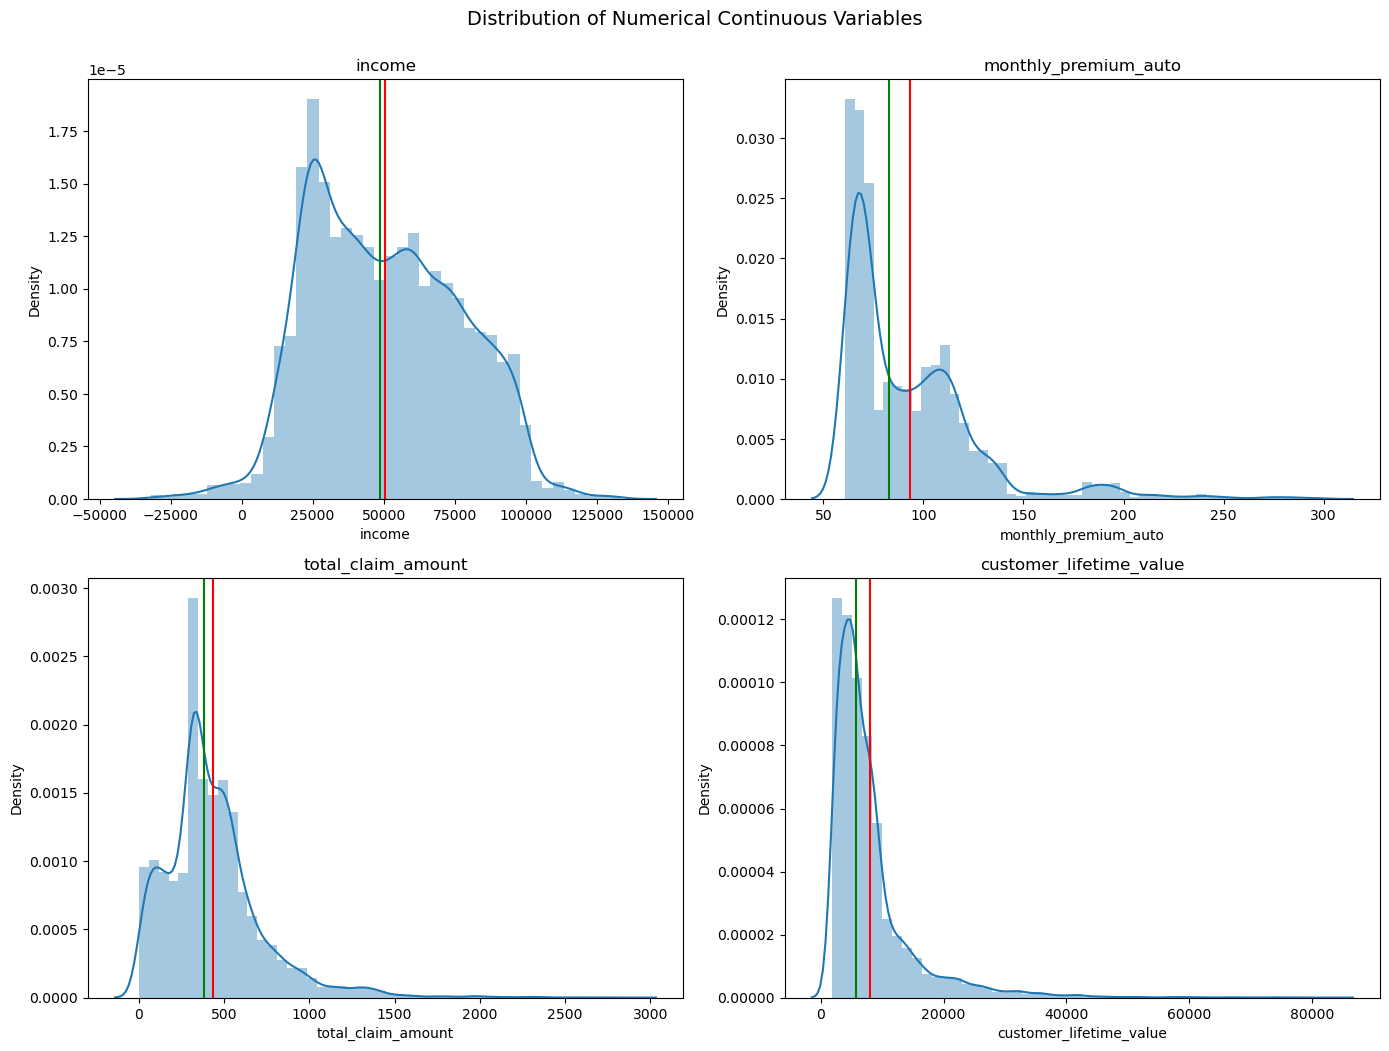

In [190]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize = (14,20))
plt.suptitle("Distribution of Numerical Continuous Variables", fontsize = 14, y=1)

for i in continuous:
    plt.subplot(a, b, c)
    plt.title('{}'.format(i, a, b, c))
    plt.xlabel(i)
    fig = sns.distplot(continuous[i])
    fig.axvline(x = continuous[i].mean(), color="red")
    fig.axvline(x = np.median(continuous[i]), color="green")
    c = c + 1
    
plt.tight_layout()
plt.show()

**Income**
- close to normal distribution and is fairy symmetrical. Note that this variable has been previously treated (interpolate polynomial order 3)

**Other 3 variables**
- Are highly skewed and look more like exponential distribution

More specifically:

In [191]:
continuous.agg(['skew', 'kurtosis']).T

,skew,kurtosis
income,0.202749,-0.635831
monthly_premium_auto,2.126229,6.214009
total_claim_amount,1.710650,5.978188
customer_lifetime_value,3.032827,13.824123


### Applying Box-Cox, Log & Squareroot Transformation

In [192]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN 
    
def sqrt_transform(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

In [193]:
def boxcox_transform(col):
    from scipy.stats import boxcox, yeojohnson
    if all(col >= 0):
        # Apply Box-Cox transform for positive values
        transformed_data, lambda_ = boxcox(col)
        return transformed_data, lambda_
    else:
        # Apply Yeo-Johnson transform for negative values
        transformed_data, lambda_ = yeojohnson(col)
        return transformed_data, lambda_

In [258]:
def plot_transformations(col):
    orig = col
    bc, lmbda = boxcox_transform(col)
    log = list(map(log_transform, col))
    sqrt = list(map(sqrt_transform, col))
    
    fig = plt.figure(figsize = (15,8))
    plt.suptitle("Data for columns: {}".format(col.name),fontsize = 14, y=1)
    
    plt.subplot(221)
    fig1 = sns.distplot(orig)
    fig1.axvline(x = orig.mean(), color="red")
    fig1.axvline(x = np.median(orig), color="green")
    plt.title('Original')
    
    plt.subplot(222)
    fig2 = sns.distplot(bc)
    fig2.axvline(x = bc.mean(), color="red")
    fig2.axvline(x = np.median(bc), color="green")
    plt.title('Box-Cox')
    
    plt.subplot(223)
    fig3 = sns.distplot(log)
    fig3.axvline(x = np.mean(log), color="red")
    fig3.axvline(x = np.median(log), color="green")
    plt.title('Log Transformed')
    
    plt.subplot(224)
    fig4 = sns.distplot(sqrt)
    fig4.axvline(x = np.mean(sqrt), color="red")
    fig4.axvline(x = np.median(sqrt), color="green")
    plt.title('Square Root')
    
    plt.tight_layout()
    plt.show()

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

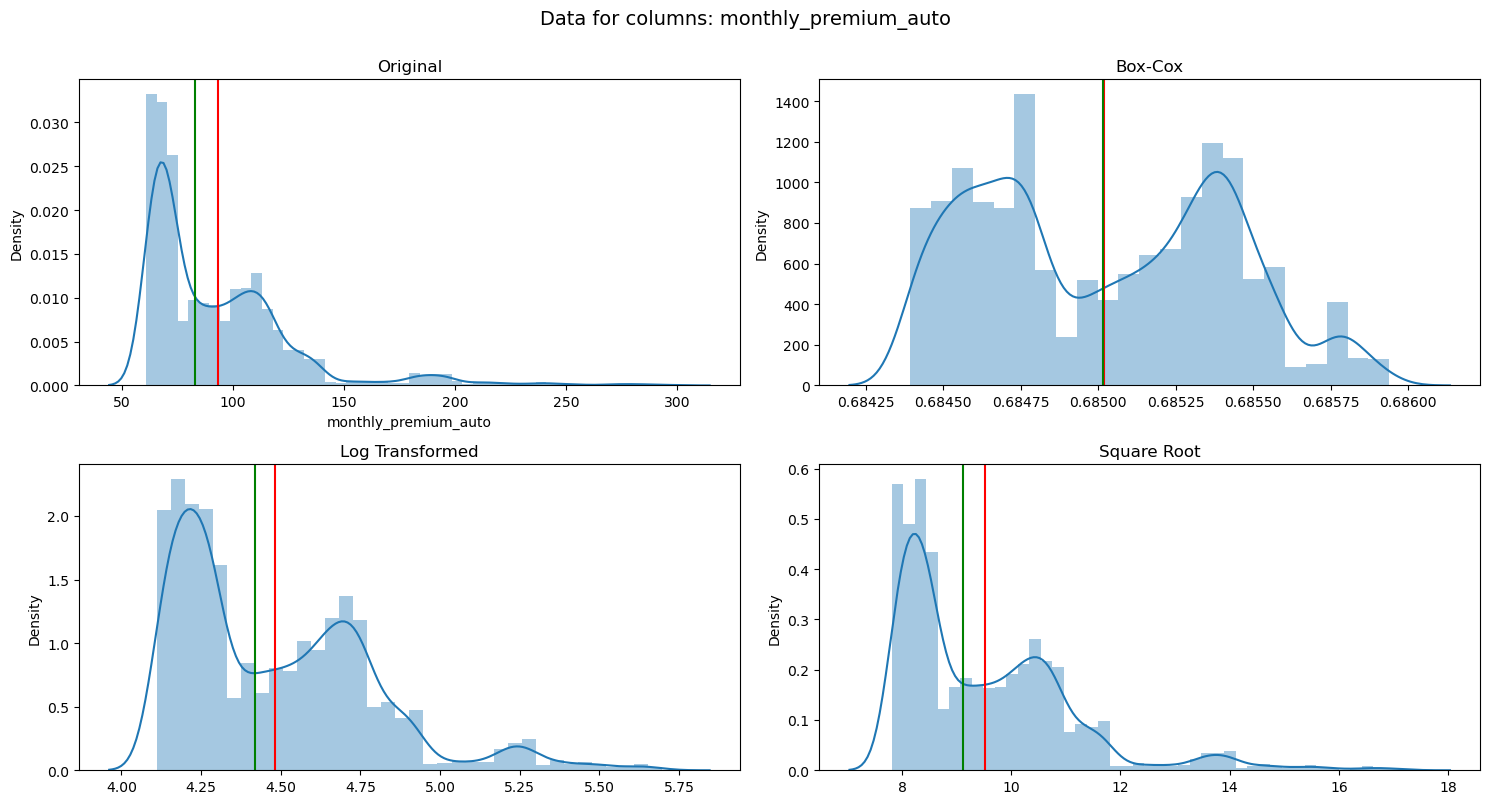

In [260]:
plot_transformations(continuous.monthly_premium_auto)

In [269]:
mpa_bc, lmbda_mpa_bc = boxcox_transform(continuous.monthly_premium_auto)
lmbda_mpa_bc.round(2)

-1.46

**Seems like box-cox which automatically applies the lambda -1.46 for this variable has the transformed the values closest to a normal distribution.**

Now applying it to each continuous variable...

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_26101/3288392666.py:3: RuntimeWarning: invalid value encountered in log
  return np.log(x)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: Fut

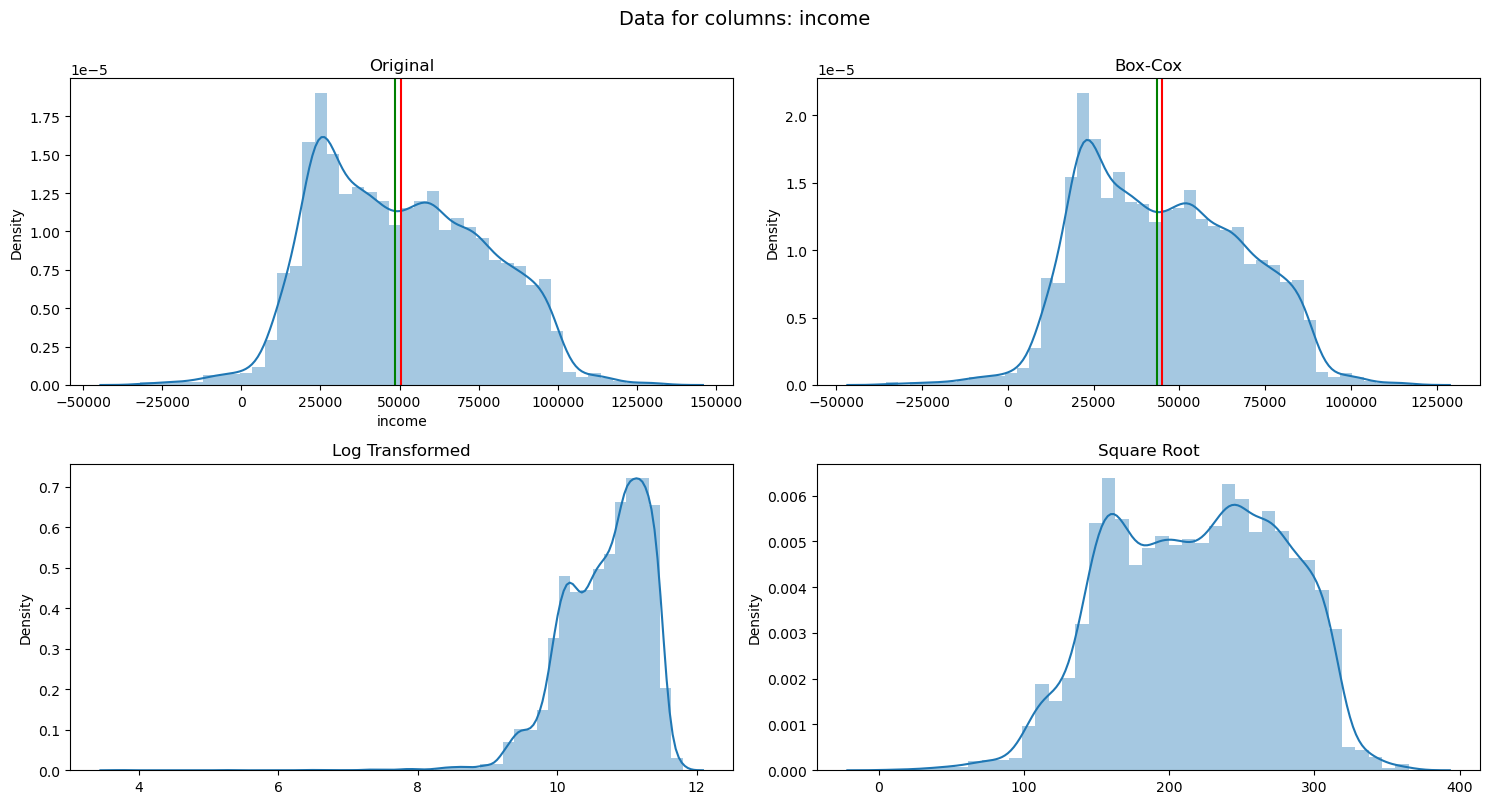

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

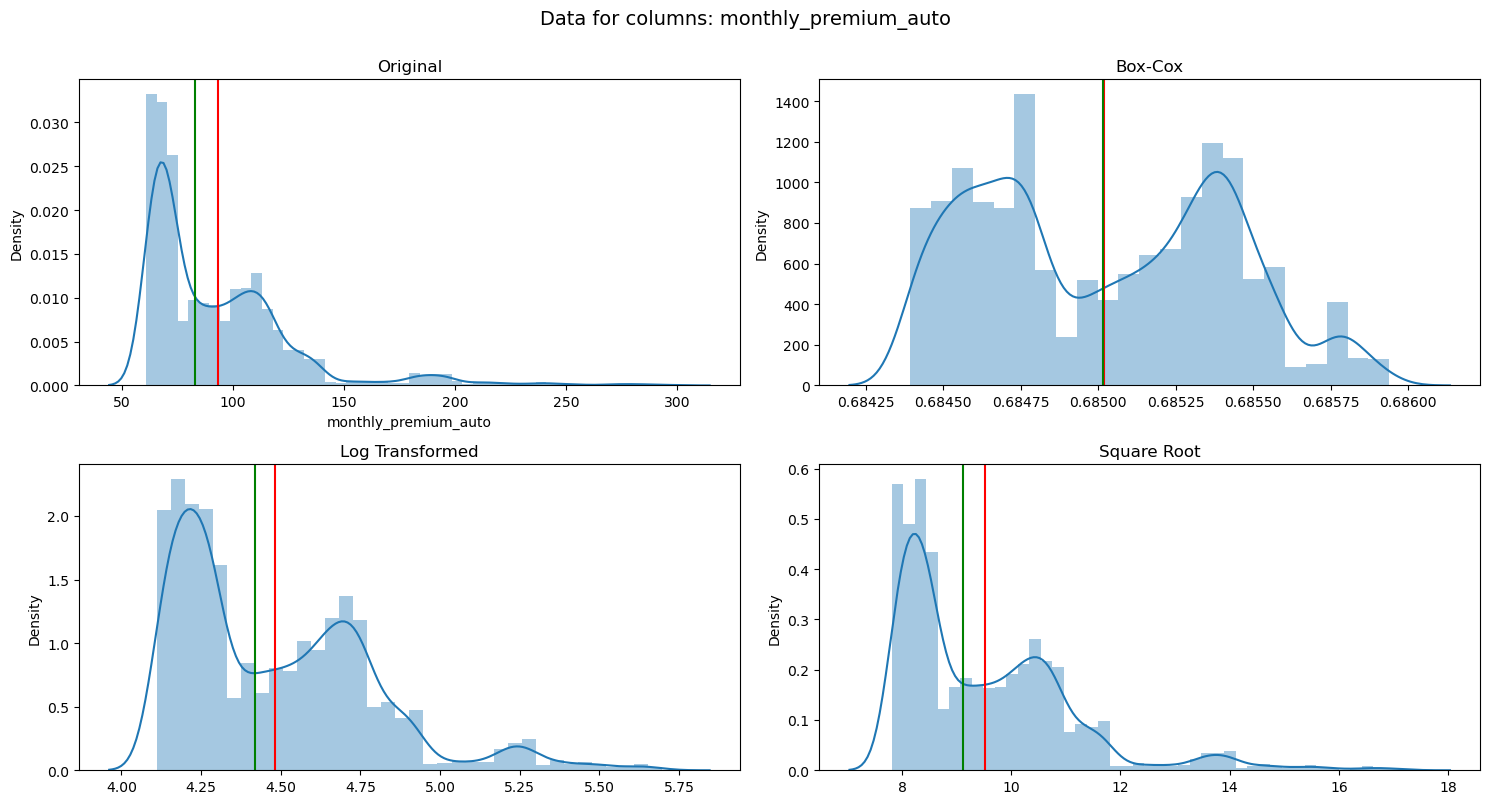

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

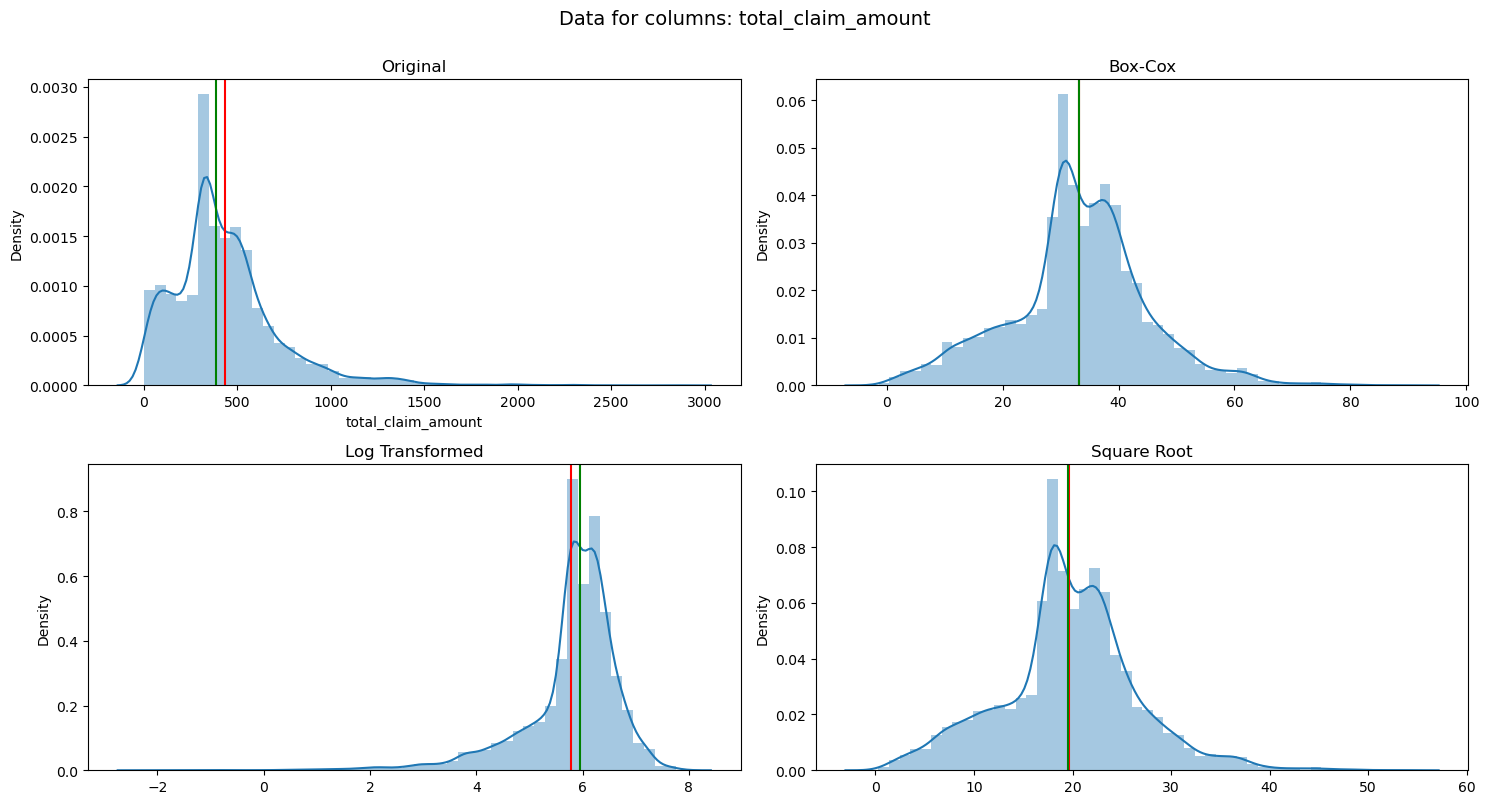

/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/rachelleflores/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

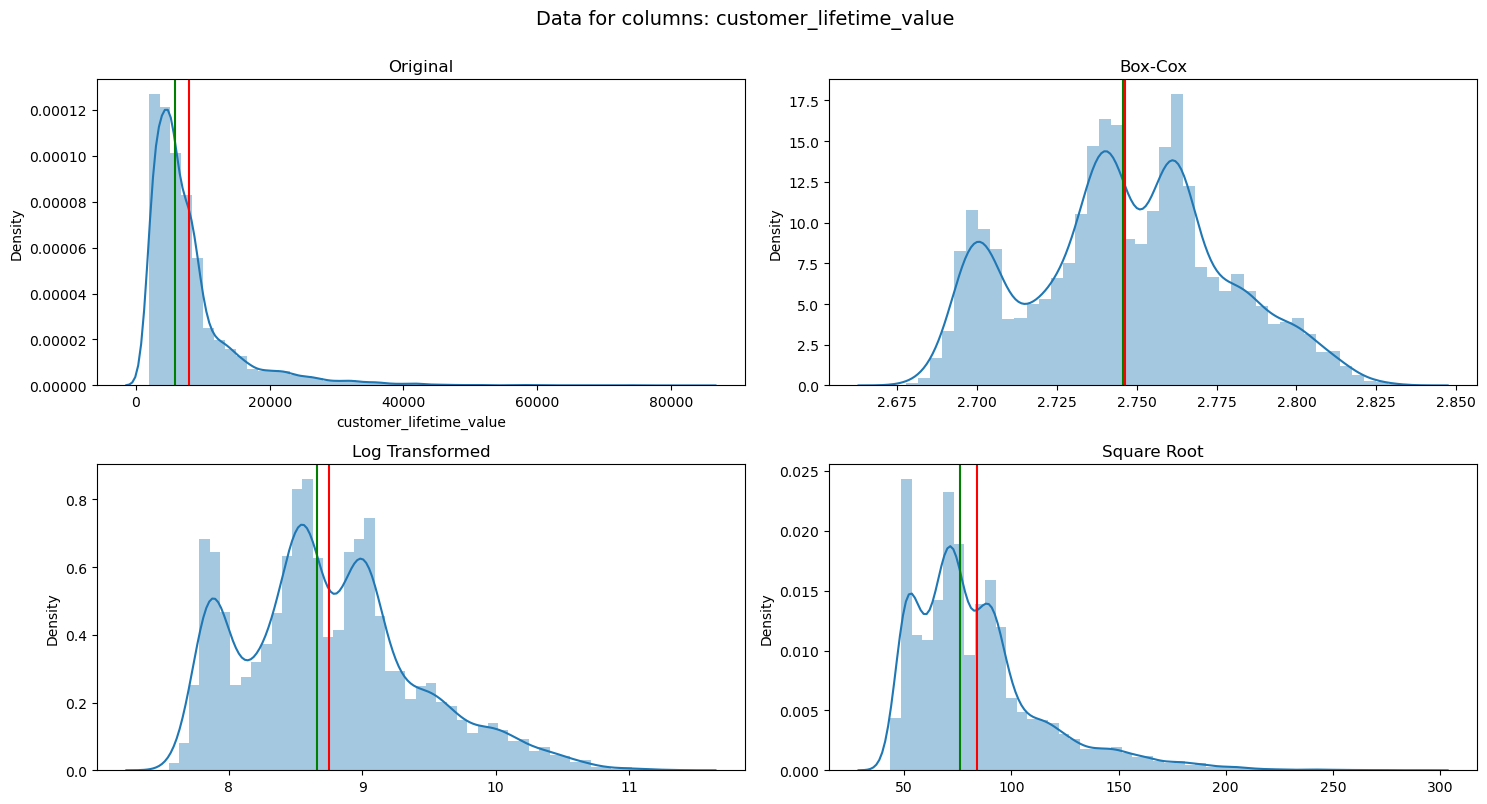

In [268]:
for i in continuous.columns:
    plot_transformations(continuous[i])

Looking at the distributions above, we can see changes depending on the transformations applied. The best transformation for each continuous variables are:
- income : square root
- monthly_premium_auto: boxcox
- total_claim_amount : boxcox
- customer_lifetime_value : boxcox

<!-- /c For the income columnn, seems the square root transformation works best. c -->